In [1]:
#!pip install --upgrade tensorflow-gpu==2.0

In [3]:
#!pip install plotly
#!pip install --upgrade nbformat
#!pip install nltk
#!pip install spacy # spaCy is an open-source software library for advanced natural language processing
#!pip install WordCloud
##!pip install gensim 
# Gensim is an open-source library for unsupervised topic modeling and natural language processing
#!pip install seaborn
!pip install jupyterthemes
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook t
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jenkir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
import os


In [7]:
!wget https://jdbc.postgresql.org/download/postgresql-42.2.22.jar

--2021-06-30 10:33:09--  https://jdbc.postgresql.org/download/postgresql-42.2.22.jar
Resolving jdbc.postgresql.org (jdbc.postgresql.org)... 2001:4800:3e1:1::228, 72.32.157.228
Connecting to jdbc.postgresql.org (jdbc.postgresql.org)|2001:4800:3e1:1::228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1005173 (982K) [application/java-archive]
Saving to: 'postgresql-42.2.22.jar'

     0K .......... .......... .......... .......... ..........  5%  765K 1s
    50K .......... .......... .......... .......... .......... 10%  813K 1s
   100K .......... .......... .......... .......... .......... 15% 2.31M 1s
   150K .......... .......... .......... .......... .......... 20% 2.16M 1s
   200K .......... .......... .......... .......... .......... 25% 1.27M 1s
   250K .......... .......... .......... .......... .......... 30% 3.00M 1s
   300K .......... .......... .......... .......... .......... 35% 2.17M 0s
   350K .......... .......... .......... .......... ..........

In [8]:
df_true = pd.read_csv("http://final-project-data-rjj.s3.us-east-2.amazonaws.com/True.csv")
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [9]:
df_fake = pd.read_csv("http://final-project-data-rjj.s3.us-east-2.amazonaws.com/Fake.csv")
df_fake.head()


title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [10]:
#create new column called 'Is_fake' in the df_true df
# assign class "1" to df_fake and class "0" to df_true
df_true['Is_fake'] = 0
df_fake['Is_fake'] = 1
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  Is_fake  
0  December 31, 2017         0  
1  December 29, 2017         0  
2  December 31, 2017         0  
3  December 30, 2017         0  
4  December 29, 2017         0

In [12]:
#concatenate real and fake news; reset_index creates one harmonized df with all of the data (index numbers will continue 
#and not be separate as they were with two different dfs); this has 44,000 different samples
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  Is_fake  
0      December 31, 2017         0  
1      December 29, 2017         0  
2      December 31, 2017         0  
3      December 30, 2017         0  
4      December 29, 2017         0  
...                   ...      ...  
44893    January 16, 2016        1  
44894    January 16, 2016        1  
44895    January 15, 2016        1  
44896    January 14, 2016        1  
44897    January 12, 2016        1  

[44898 rows x 5 columns]

In [13]:
# the output class is the Is_fake; drop date column because do not need
# inplace = True makes the removal of the column permanently, removes it from memory
df.drop(columns = ['date'], inplace = True)
#combine title and text together; new column 'original' created from merging the 'title' and 'text' columns
df['combined'] = df['title'] + ' '+df['text']
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  Is_fake  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews        0   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews        0   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews        0   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews        0   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews        0   

                                            combined  
0  As U.S. budget fight looms, Republicans flip t...  
1  U.S. military to accept transgender recruits o...  
2  Senior U.S. Republican senator: 'Let Mr. Muell...  
3  FBI Russia probe helped by Australian diplomat...  
4  Trump wants Postal Service to charge 'much mor...

In [14]:
# this shows the content of the original column, row 0
df['combined'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [ ]:
# PERFORM DATA CLEANING

In [15]:
# download stop words
# if you see "True" after running, the package has been loaded correctly
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jenkir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
# obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 'use'])

In [17]:
# to see the entire list of stop words
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# create function to remove stopwords and remove words with 2 or less characters
# result = [] used to return the result
# gensim is a powerful library for nlp
# "token" means "word"
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        # for any word to be appended to the results, it has to pass 2 checks - 1) is the word/ token a stopword - if it is not in the stopwords, 
        # we want it so append it/ return it to the results and 2) length of word greater than 2??
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result      
        
            
            

In [19]:
# apply the preprocess function created in the cell above to the df
# this creates a new column "clean" from the "combined" column with only tokens that are not stop words and that do not have 2 or less characters
df['clean'] = df['combined'].apply(preprocess)

In [20]:

df['clean'].head()

0    [budget, fight, looms, republicans, flip, fisc...
1    [military, accept, transgender, recruits, mond...
2    [senior, republican, senator, mueller, washing...
3    [russia, probe, helped, australian, diplomat, ...
4    [trump, wants, postal, service, charge, amazon...
Name: clean, dtype: object

In [21]:
# show combined news; [0] is the row
df['combined'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [22]:
# show cleaned up news after removing stopwords; will see that all of the tokens/ words are separated
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [23]:
# obtain the total number of words now present in the dataset
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [24]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [25]:
# output shows that there are 9,276,947 samples in the list_of_words
len(list_of_words)

9276947

In [26]:
# obtain the total number of unique words; using "set" returns back only the unique words; output of this shows there are 108,704 unique words
total_words = len(list(set(list_of_words)))
total_words

108704

In [27]:
# join the words into one massive string that contains all of the words (so they are no longer separated)
# code below joins all of the words that are separated by a space ( " ") and creates new df column called 'cleaned_joined'
df['cleaned_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [29]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [30]:
# view samples as a way of performing checks
df['cleaned_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

In [ ]:
# VISUALIZE CLEANED UP DATASET

<AxesSubplot:xlabel='count', ylabel='subject'>

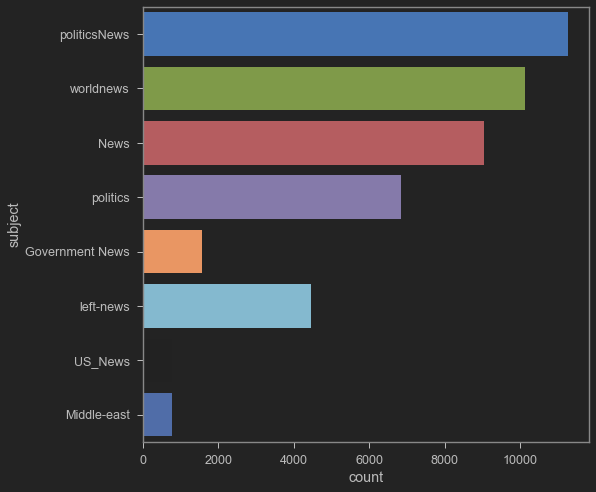

In [32]:
# plot the number of samples in 'subject'
# sns.countplot asks to count the number of different "subjects" in the "subject" column
# data = df says that the source of the data is "df" (our dataframe)
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)


<AxesSubplot:xlabel='count', ylabel='Is_fake'>

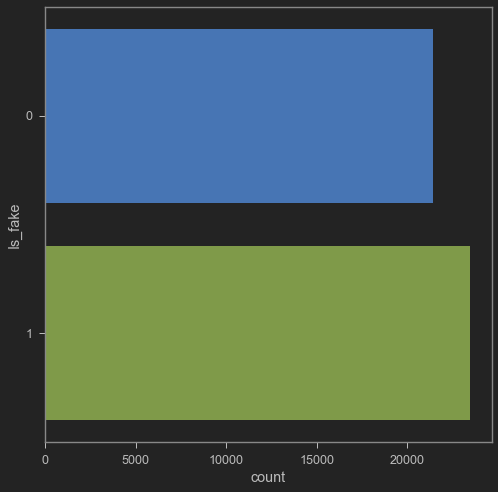

In [35]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "Is_fake", data = df)


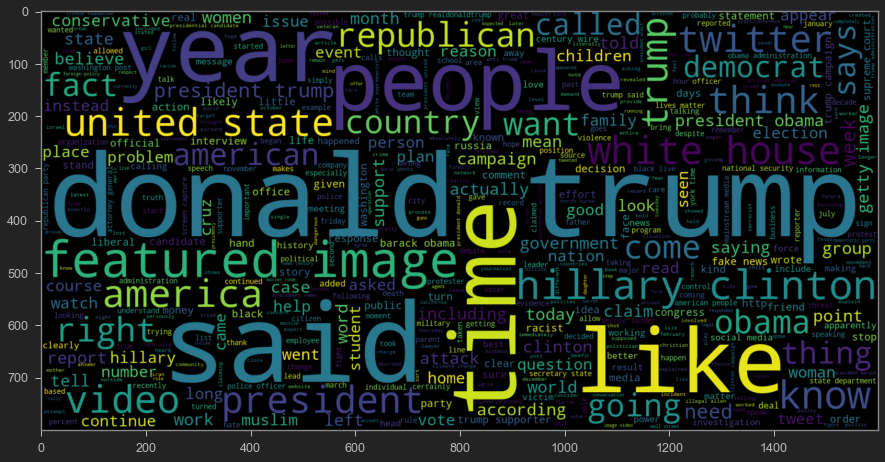

In [39]:
# plot the word cloud for text that is real to see importance of each of the words
# used from:     from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (15, 15))
#code below is printing out the most common words when the news is fake ( "df.isfake == 1")
wc = WordCloud(max_words = 500, width = 1600, height = 800, stopwords = stop_words).generate(" ".join(df[df.Is_fake == 1].cleaned_joined))
plt.imshow(wc, interpolation = "bilinear")

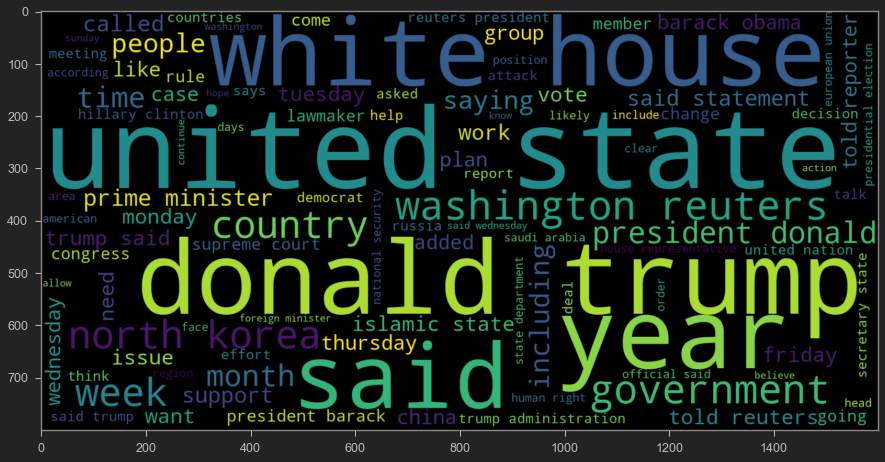

In [41]:
plt.figure(figsize = (15, 15))
#code below is printing out the most common words when the news is real( "df.isfake == 0")
wc = WordCloud(max_words = 100, width = 1600, height = 800, stopwords = stop_words).generate(" ".join(df[df.Is_fake == 0].cleaned_joined))
plt.imshow(wc, interpolation = "bilinear")

In [42]:
nltk.word_tokenize(df['cleaned_joined'][0])

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [43]:
# length of maximum document (news)  will be needed to create word embeddings
# need to go through every sample in the dataframe to obtain maximum amount/ length of words in any news sample
# cleaned_joined is name of column we created
# maxlen is variable, have set it to -1 initially
maxlen = -1
for doc in df.cleaned_joined:
    # use nltk.word_tokenize(doc)  to divide each of the complete sentences into tokens
    tokens = nltk.word_tokenize(doc)
    # if after going through the samples, the length of tokens is more than the maxlen, then that will be the new maxlen
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [45]:
#visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.cleaned_joined], nbins = 100)
fig.show()

In [ ]:
# PREPARE DATA BY PERFORMING TOKENIZATION AND PADDING
# tokenizer allows us to vectorize text by turning each text into a sequence of integers
# a token is an integer representing a text/ word

In [48]:
# split data into test and train
from sklearn.model_selection import train_test_split
# in code below, "df.clean_joined" is x (the input) and "df.isfake" is y (the target)
# test_size = 0.2 indicates that 20% of the data will be used for testing - and so 80% will be allocated for training
x_train, x_test, y_train, y_test = train_test_split(df.cleaned_joined, df.Is_fake, test_size = 0.2)

In [49]:
from nltk import word_tokenize

In [50]:
# create a tokenizer to tokenize the words and create sequences of tokenized words
# use fit_on_texts on the x_train and will feed it back to the tokenizer
# fit_on_texts creates a vocabulary index based on word frequency, every word gets a unique integer value

tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
# use tokenizer to convert from text data to integers; the lines below do the actual conversion from text to integers
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [53]:
len(train_sequences)

35918

In [ ]:
train_sequences

In [54]:
len(test_sequences)

8980

In [52]:
print("The encoding for document\n", df.cleaned_joined[0], "\n is: ", train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [55]:
# add padding to make sure that all samples are the exact same length using pad_sequences
# either be maxlen = 4405 or smaller number, maxlen = 40 seems to work well based on results
# the number 4405 comes from the max # of words calculated earlier??
padded_train = pad_sequences(train_sequences, maxlen = 4405, padding = 'post', truncating ='post')
padded_test = pad_sequences(test_sequences, maxlen = 4405, truncating ='post')

In [56]:
for i, doc in enumerate(padded_train[:2]):
    print("the padded encoding for document", i+1," is : ",doc)

the padded encoding for document 1  is :  [1140  282 1738 ...    0    0    0]
the padded encoding for document 2  is :  [ 3394 43212  2311 ...     0     0     0]


In [ ]:
# BUILD AND TRAIN MODEL USING KERAS AND TENSORFLOW

In [57]:
# sequential model
model = Sequential()

In [61]:
# from tensorflow.org: word embeddings allow us to use an efficient representation in which similar words have similar encoding:
# an embedding is a dense vector of floating point values (the length of the vector is parameter we specify;
# instead of specifying values for the embedding manually, they are trainable parameters (weights learned by the model during training)
# another way to think of embedding is as a "lookup table" that maps from integer indices (which stand for specific words) to dense vectors
# (their embeddings); the dimensionality (or width) of the embedding is a parametere you can experiment with to see what works well for our problem,
# much in the same way you can experiment with number of neurons in a Dense layer

# embedding layer; we got total_words variable earlier in this code
# using this instead of one-hot encoding bc one-hot encoding is inefficient (most indices are zero)
embedding_layer = tf.keras.layers.Embedding(total_words, 128)

# model.add(Embedding(total_words, output_dim = 240))

In [62]:
model.add(embedding_layer)

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [ ]:
# Bi-directional RNN/LSTM
model.add(Bidirectional(LSTM(128)))


In [ ]:
# Dense layers; 128 is the # of layers;  'acc' is 'accuracy'
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

In [ ]:
total_words

In [ ]:
# convert y_train to an array
y_train = np.asarray(y_train)

In [ ]:
# train the model
# input is "padded_train", output is "y_train"
# validation_split = 0.1 because we are going to use 10% of the data for validation and 90% for training
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

In [ ]:
# as model is being trained, after every epoch, we want to see if the error on the validation data is decreasing or not
# if the error on the training data and the validation data is going down also, that is good - means the model is able to generalize
# if the error on the training data is going down but error on validation data is going up, that is a problem


In [ ]:
# ASSESS TRAINED MODEL PERFORMANCE

In [ ]:
# make prediction by applying the predict method on the model & feed in the test data instead of the training data
pred = model.predict(padded_test)

In [ ]:
# if the predicted value is > 0.5, it is real, else it is fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

In [ ]:
# then print out the confusion matrix to visualize the model's predictions vs. the actual "ground truth"
from sklearn.metrics import confusion_matrix
cm = confusion.matrix(list(y_test, prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)
                   